In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Read dataset
df = pd.read_csv('world_population.csv')
print(df.head().to_string())

   Rank CCA3 Country/Territory           Capital Continent  2022 Population  2020 Population  2015 Population  2010 Population  2000 Population  1990 Population  1980 Population  1970 Population  Area (km²)  Density (per km²)  Growth Rate  World Population Percentage
0    36  AFG       Afghanistan             Kabul      Asia         41128771         38972230         33753499         28189672         19542982         10694796         12486631         10752971      652230            63.0587       1.0257                         0.52
1   138  ALB           Albania            Tirana    Europe          2842321          2866849          2882481          2913399          3182021          3295066          2941651          2324731       28748            98.8702       0.9957                         0.04
2    34  DZA           Algeria           Algiers    Africa         44903225         43451666         39543154         35856344         30774621         25518074         18739378         13795915  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

📌 Questions:

What are the most populous countries?

What’s the urbanization trend across continents?

How does population density compare globally?

Country/Territory
China            1425887337
India            1417173173
United States     338289857
Indonesia         275501339
Pakistan          235824862
Nigeria           218541212
Brazil            215313498
Bangladesh        171186372
Russia            144713314
Mexico            127504125
Name: 2022 Population, dtype: int64


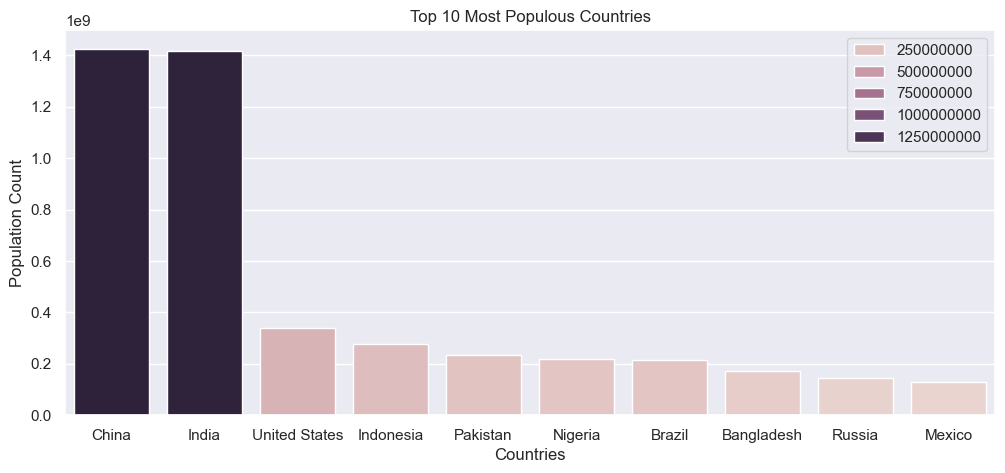

In [12]:
# Most populous countries
pop_countries = df.groupby('Country/Territory')['2022 Population'].sum().sort_values(ascending=False).head(10)
print(pop_countries)

# Visualisation
sns.set_theme()
plt.figure(figsize=(12,5))
sns.barplot(x=pop_countries.index,y=pop_countries.values,hue=pop_countries.values)
plt.title('Top 10 Most Populous Countries')
plt.xlabel('Countries')
plt.ylabel('Population Count')
plt.show()

From the analysis, China is the most populous country based on recent census(2022)

China and India are a lot more populous that the remaining 8 countries in the top 10

Continent            Africa        Asia     Europe  North America   Oceania  South America
1970 Population   365444348  2144906290  655923991      315434606  19480270      192947156
1980 Population   481536377  2635334228  692527159      368293361  22920240      241789006
1990 Population   638150629  3210563577  720320797      421266425  26743822      297146415
2000 Population   818946032  3735089604  726093423      486069584  31222778      349634282
2010 Population  1055228072  4220041327  735613934      542720651  37102764      393078250
2015 Population  1201102442  4458250182  741535608      570383850  40403283      413134396
2020 Population  1360671810  4663086535  745792196      594236593  43933426      431530043
2022 Population  1426730932  4721383274  743147538      600296136  45038554      436816608


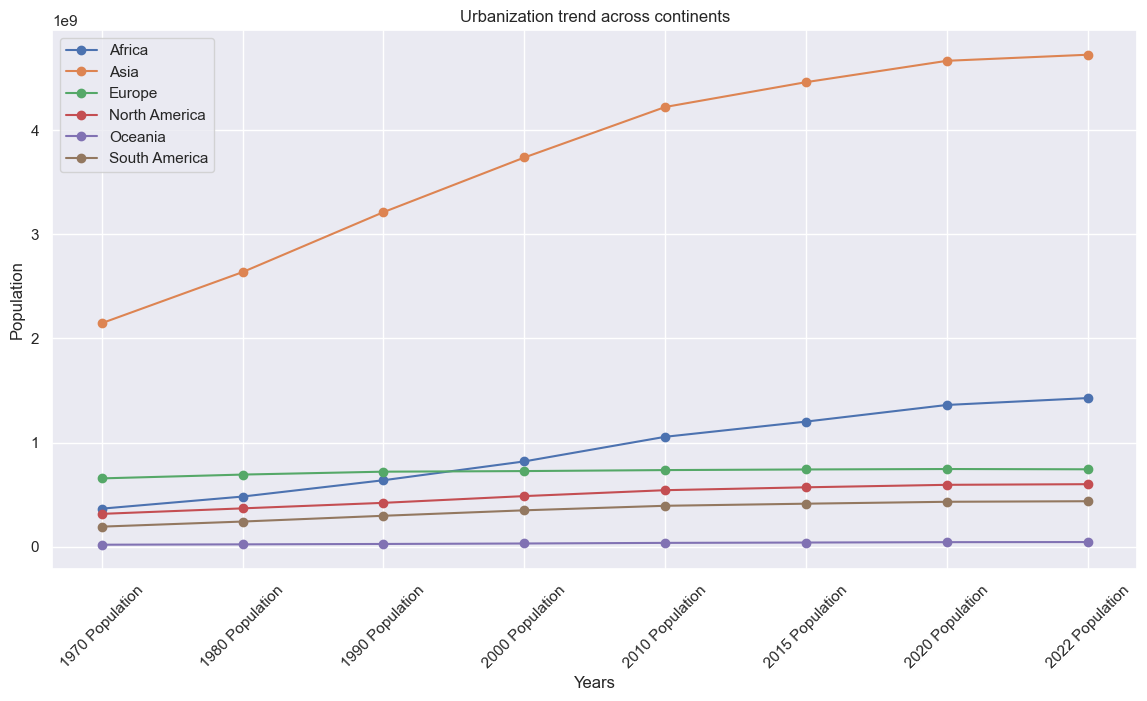

In [45]:
# Urbanization trend across continents
years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']
urb_trend = df.groupby('Continent')[years].sum().T
print(urb_trend.to_string())

# visualisation
plt.figure(figsize=(14,7))
for year in urb_trend.columns:
	plt.plot(urb_trend.index, urb_trend[year], label=year, marker='o')
plt.title('Urbanization trend across continents')
plt.xlabel('Years')
plt.ylabel('Population')
plt.legend()
plt.xticks(rotation=45)
plt.show()

From the analysis,
1. Asia and Africa are the continents with the highest population growth over the years.
2. Oceania and Europe increased slightly over the years.
3. Europe also has a slight increase.
4. From year 2000, Africa has had a rapid growth.

In [47]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [73]:
# Global comparison of population density

fig_density = px.choropleth(
	df,
 locations='CCA3',
 color='Density (per km²)',
 hover_name='Country/Territory',
 color_continuous_scale='Blues',
 range_color=[0,1500],
 title='🌍 Global Population Density(2022)'
)
fig_density.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig_density.show()